## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('ggplot')

In [2]:
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

先用 linear regression 做一個比對的標準

In [16]:
# 建立一個線性回歸模型
regr = linear_model.LinearRegression()
# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)
# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

Mean squared error: 25.42
0.7263451459702503


然後逐步增加$\alpha$ 查看 lasso的係數

Mean squared error: 26.45 [1 1 1 1 0 1 1 1 1 1 1 1 1]
Mean squared error: 26.60 [1 1 1 0 0 1 1 1 1 1 1 1 1]
Mean squared error: 26.65 [1 1 1 0 0 1 1 1 1 1 1 1 1]
Mean squared error: 26.76 [1 1 1 0 0 1 1 1 1 1 1 1 1]
Mean squared error: 26.94 [1 1 1 0 0 1 1 1 1 1 1 1 1]
Mean squared error: 27.22 [1 1 1 0 0 1 0 1 1 1 1 1 1]
Mean squared error: 27.59 [1 1 0 0 0 1 1 1 1 1 1 1 1]
Mean squared error: 27.98 [1 1 0 0 0 1 1 1 1 1 1 1 1]
Mean squared error: 28.43 [1 1 0 0 0 1 1 1 1 1 1 1 1]
Mean squared error: 28.95 [1 1 0 0 0 1 1 1 1 1 1 1 1]
Mean squared error: 29.54 [1 1 0 0 0 1 1 1 1 1 1 1 1]


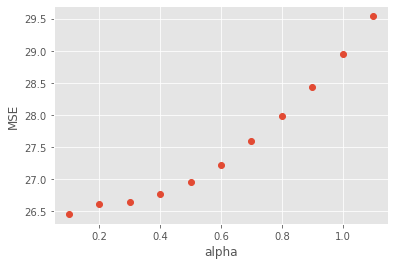

In [64]:
pxy=[[],[]]
for i in range(1,12):
    lasso = linear_model.Lasso(alpha=i/10)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred),np.where(lasso.coef_,1,0))  
    pxy[0].append(i/10)
    pxy[1].append(mean_squared_error(y_test, y_pred))
plt.plot(pxy[0],pxy[1],'o')
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

做一個沒有調整過的 Ridge Regression

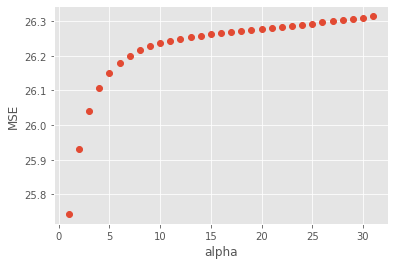

In [65]:
selectFeatures= list(range(13))
pxy=[[],[]]
for i in range(1,32):
    alpha = i
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(x_train[:,selectFeatures], y_train)
    y_pred = ridge.predict(x_test[:,selectFeatures])
    #print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
    pxy[0].append(alpha)
    pxy[1].append(mean_squared_error(y_test, y_pred))
plt.plot(pxy[0],pxy[1],'o')
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

作為對照組，用 lasso 來做 feature selection

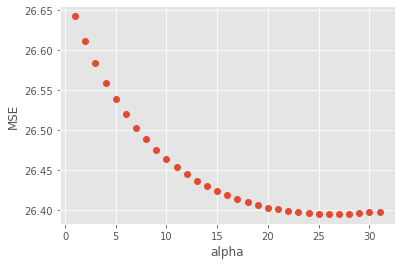

In [61]:
selectFeatures= list(range(13))
selectFeatures.remove(4)
pxy=[[],[]]
for i in range(1,32):
    alpha = i
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(x_train[:,selectFeatures], y_train)
    y_pred = ridge.predict(x_test[:,selectFeatures])
    #print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
    pxy[0].append(alpha)
    pxy[1].append(mean_squared_error(y_test, y_pred))
plt.plot(pxy[0],pxy[1],'o')
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

評估成果
1. 此資料集並沒有因為正規化(regularization)得到任何效能的提昇
2. 用 lasso 來做 feature selection 後的 ridge，會得到 alpha 越高MSE 逐步降低的效果
3. MSE 逐步降低的效果。最低沒有低於lasso 得到的MSE最低值